# ActivityRec - An App for Self-Care Recommendation
In this vignette the ActivityRec package will be explained.

**Author:** Fleur Korzilius
**Year:** 2023

## Content
- Introduction
- Basic usage
- Dash app
    - Tab 1: activity recommender
    - Tab 2: user activity input

### Introduction
The ActivityRec package allows one to run a Dash app that recommends self-care activities based on user input on physical and mental energy, whether they want to leave their house and what the weather is like. This app is meant to make the process of self-care a little bit easier.

The package is divided into several modules:
- **activity_rec**: core function that turns user input into recommended activity
- **test_activity_rec**: unit testing on activity_rec function
- **app**: code of dash app layout and callbacks

### Basic usage
The code: what does it do

#### Activity_rec

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Research Master Psychology UVA\Semester IV\Programming - The Next Step\activities.csv', encoding="ISO-8859-1", sep=";")

def activity_rec(n_clicks, physical, mental, leaving, rain, temperature):
        '''
            Function to extract activity that matches arguments
            :param n_clicks: to see whether user has filled in all information
            :param physical: user input about physical energy
            :param mental: user input about mental energy
            :param leaving: user input about whether they want to leave the house or stay in
            :param rain: user input about the weather conditions
            :param temperature: user input about the weather conditions
            :return: returns the activity that matches input
        '''

        if n_clicks > 0:
            # if user clicks submit button, function starts running

            if rain == 'Rainy':
                location = 'Inside'
            elif temperature == 'Cold' and rain == 'Cloudy':
                location = 'Inside'
            else:
                location = 'Outside'

            activity = 'Error: No activities match your state'
            requirements = np.array([physical, mental, location, leaving], dtype=object)

            for index, row in df.iterrows():
                database = np.asarray(row[['Physical', 'Mental', 'Location', 'Leaving']])
                if np.array_equal(database, requirements):
                    activity = row['Activity']
                    #if requirements and the row that is being looped over are equal, then activity gets saved
                
            return f'{activity}'

#### Unit testing

In [4]:
import unittest
import activity_rec

class TestRec(unittest.TestCase):

    def test_rec(self):
        self.assertEqual(activity_rec.activity_rec(1, 1, 'Yes', 'Sunny', 'Warm'), 'Sit in the sun')
        # when cloudy and cold -> inside
        self.assertEqual(activity_rec.activity_rec(1, 3, 'No', 'Cloudy', 'Cold'), 'Reading')
        # when rainy (cold and warm) -> inside
        self.assertEqual(activity_rec.activity_rec(1, 3, 'No', 'Rainy', 'Warm'), 'Reading')

if __name__ == '__main__':
    unittest.main()

E
ERROR: C:\Users\fleur\AppData\Roaming\jupyter\runtime\kernel-93f87302-b612-46d2-a17e-8d20bf337bac (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\fleur\AppData\Roaming\jupyter\runtime\kernel-93f87302-b612-46d2-a17e-8d20bf337bac'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

c:\research master psychology uva\semester iv\programming - the next step\python\venv\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Dash app
The app has two tabs, in which distinct actions can be performed. The first tab is the main activity recommender, whereas the second tab allows for own activity input.
#### Tab 1: activity recommender
The first tab recommends an activity based on user input.



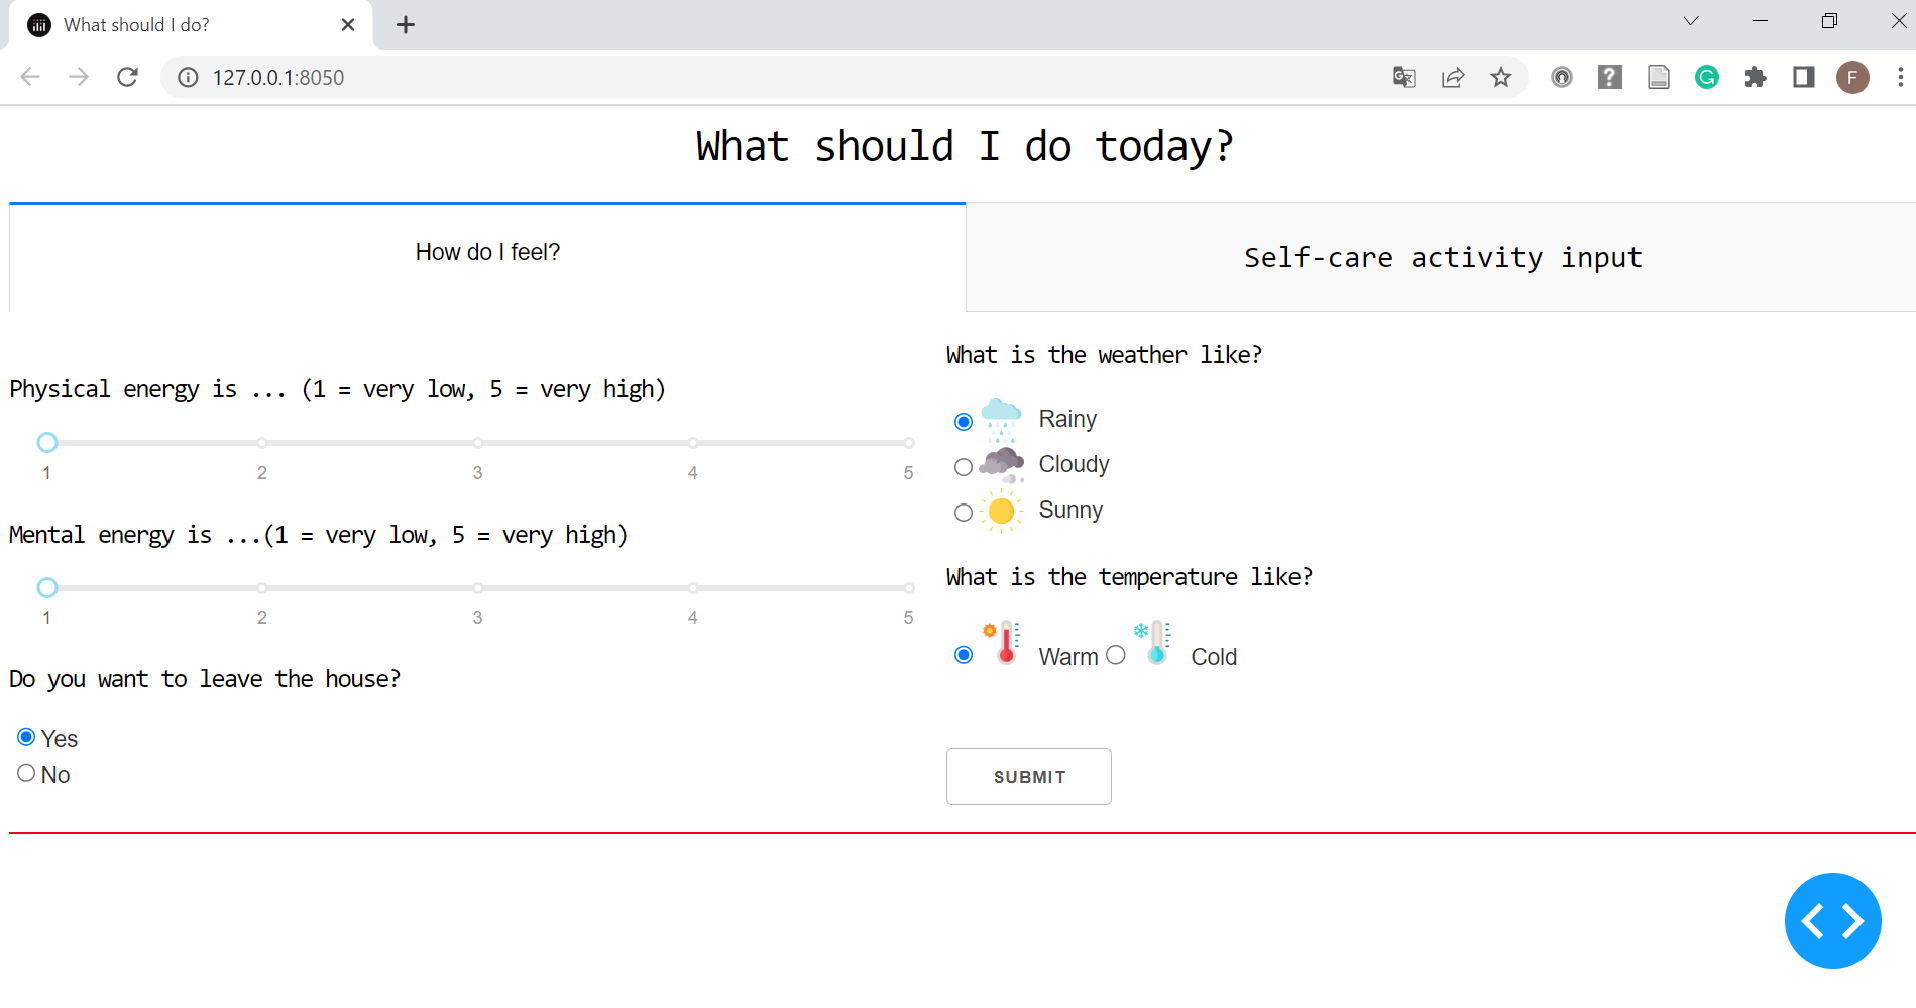

The user answers the five questions based on their situation, after which they click submit. Once the submit button is clicked, an activity emerges at the bottom of the screen.

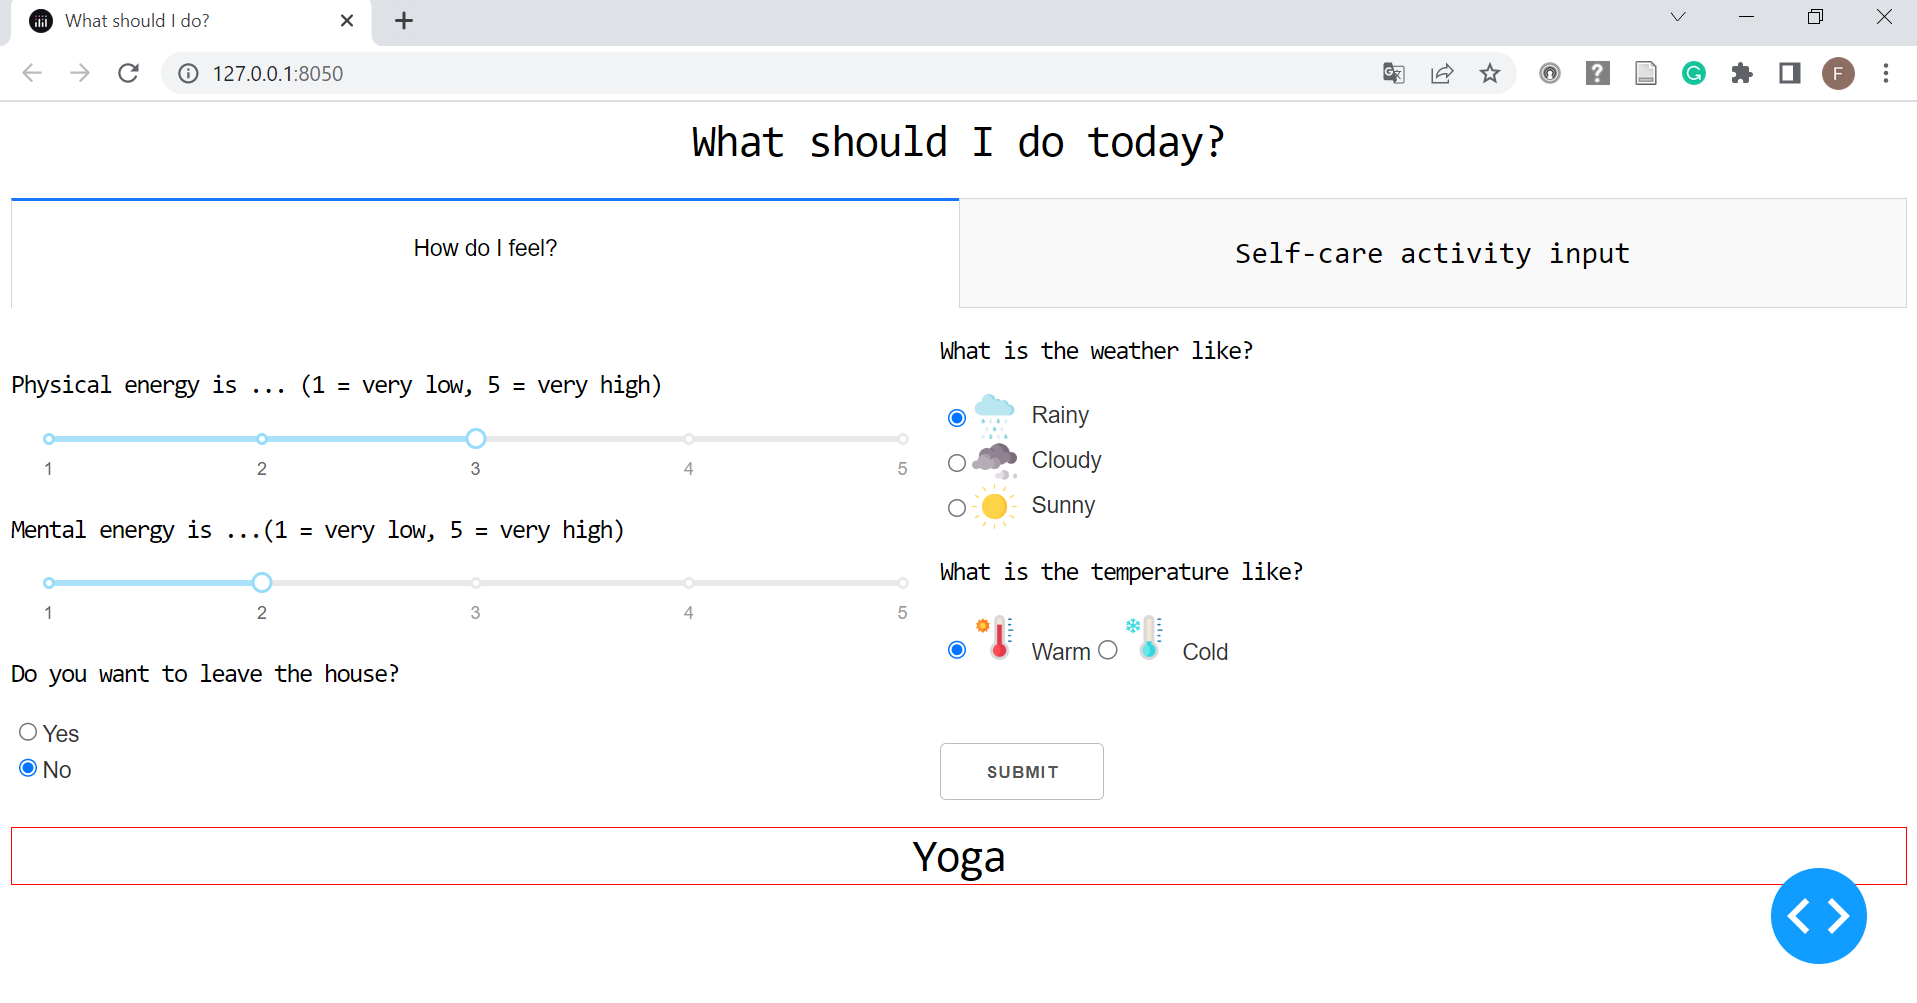

If the user input does not match any of the activities in the database, an error message gets presented.

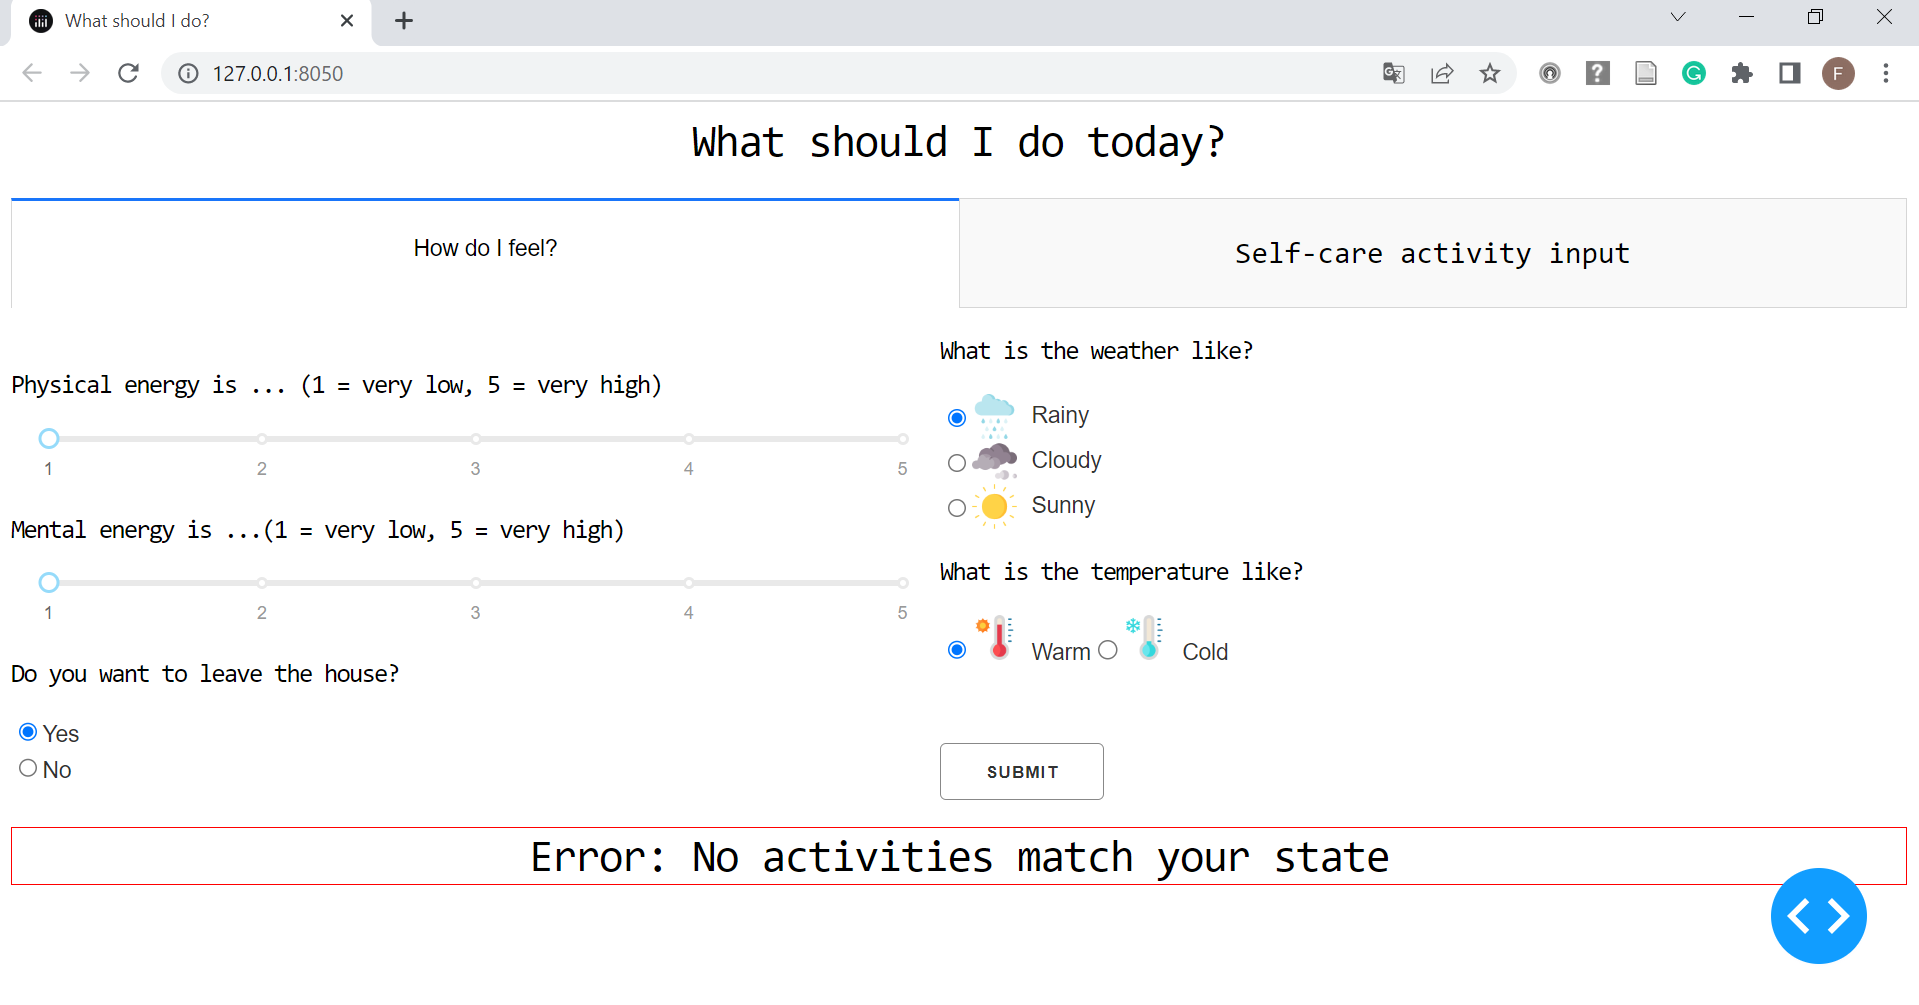

#### Tab 2: user activity input
The second tab allows users to edit the list of self-care activities that is used as the database in tab 1. The user can edit activity names, the energy inputs and location, as well as adding new activities and removing activities that do not suit them.

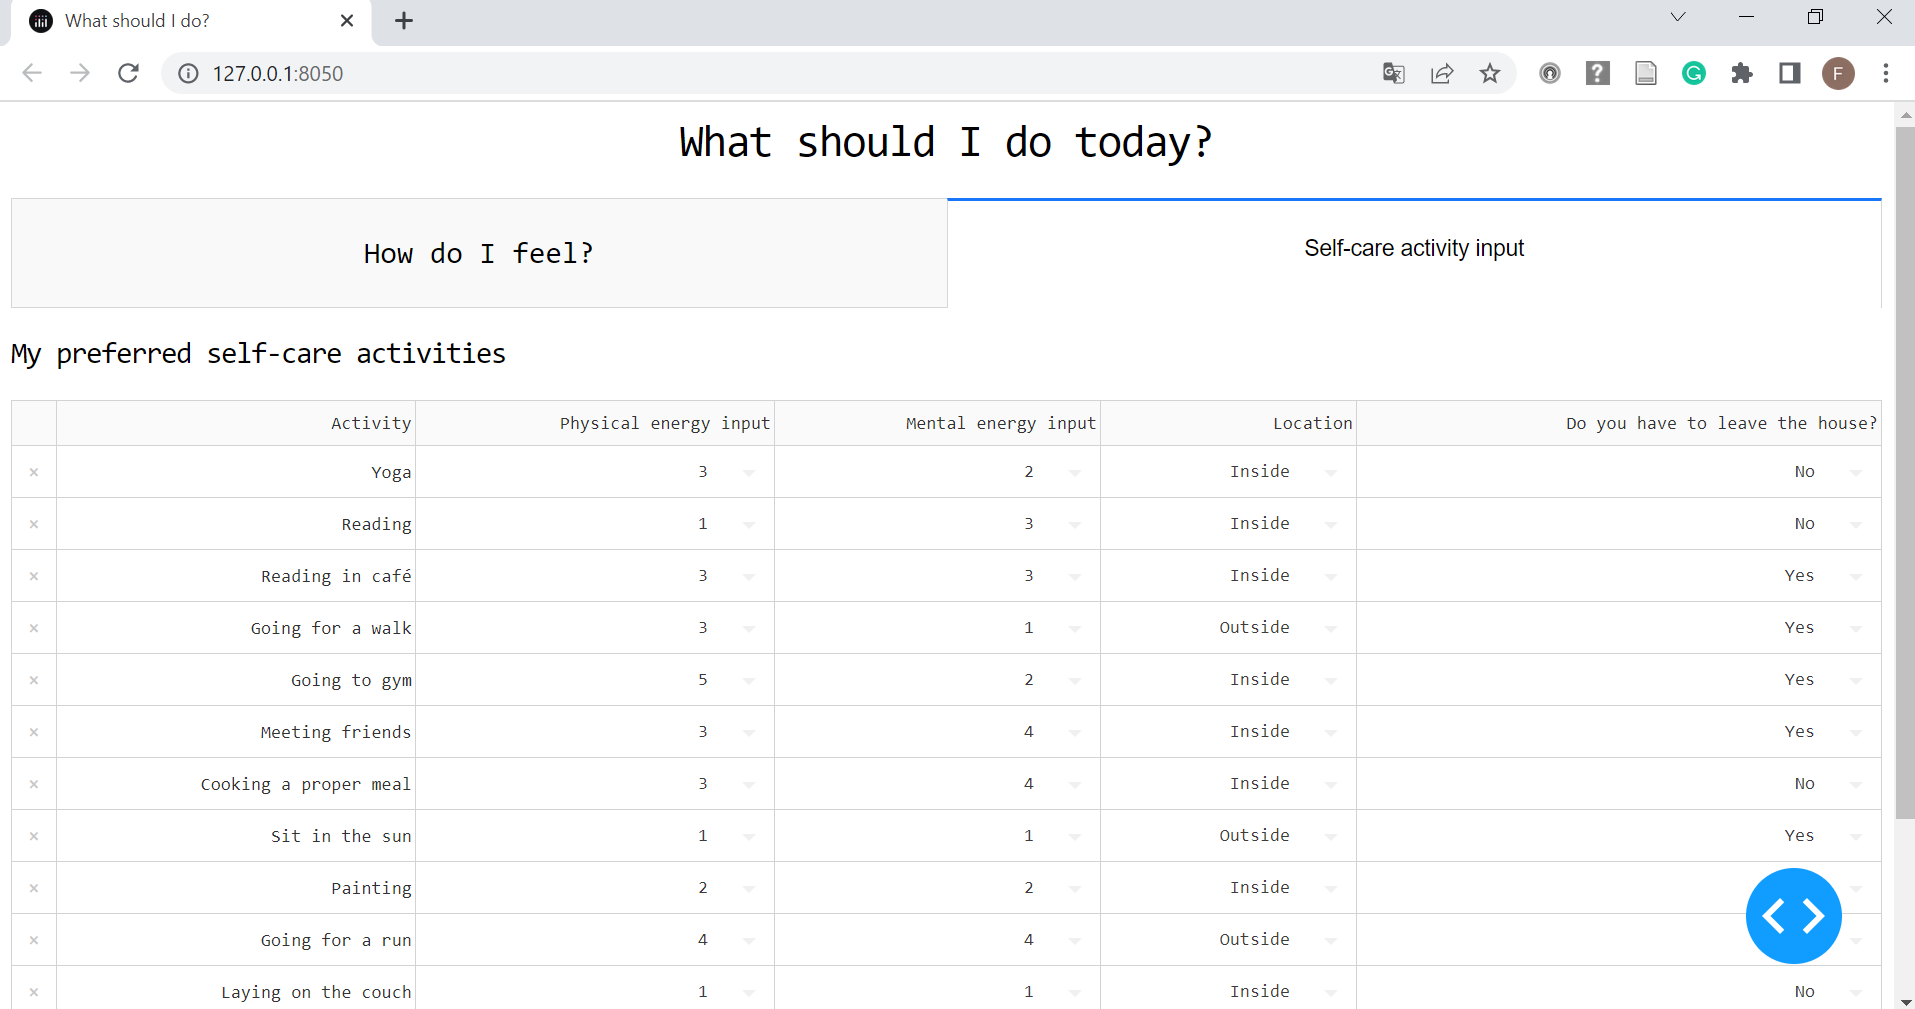